# Importing starting libraries

In [61]:
import pandas as pd

In [2]:
import numpy as np  

In [3]:
import matplotlib.pyplot as plt  
%matplotlib inline

In [8]:
import seaborn as sns

In [7]:
student_scores = pd.read_csv("http://bit.ly/w-data")

s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA: Exploratory Data Analysis using matplotlib and seaborn libraries

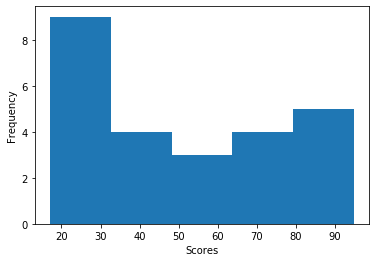

In [62]:
plt.hist(student_scores.Scores, bins=5)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

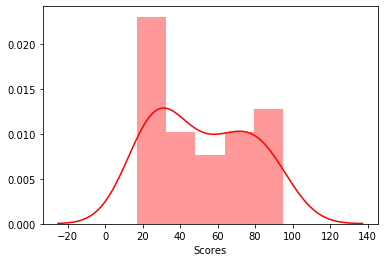

In [21]:
sns.distplot(s_data.Scores,bins=5, color='red')

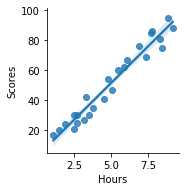

In [26]:
sns.pairplot(student_scores, x_vars='Hours',y_vars='Scores',aspect=1, kind ='reg')

* We are seeing a positive relationship
* High corr shown below

In [27]:
student_scores.Hours.corr(student_scores.Scores)

0.9761906560220887

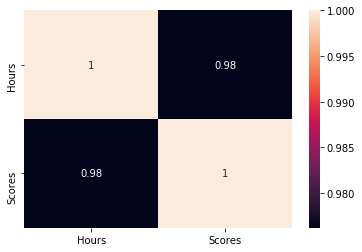

In [32]:
sns.heatmap(student_scores.corr(), annot=True)

# Model Building

In [40]:
X = student_scores[['Hours']]
Y = student_scores.Scores

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.7, random_state=1)

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print('The intercept is:', lin_reg.intercept_)
print('The coefficient is:', lin_reg.coef_)

The intercept is: 0.08312486598528324
The coefficient is: [10.3834608]


In [56]:
y_pred = lin_reg.predict(X_test)
y_pred[:10]

array([11.50493174, 34.34854549, 19.81170038, 88.34254163, 49.92373669,
       80.035773  , 63.42223572, 76.92073476, 36.42523765, 33.31019941])

In [57]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
14,17,11.504932
13,42,34.348545
17,24,19.811700
3,75,88.342542
21,54,49.923737
10,85,80.035773
18,67,63.422236
19,69,76.920735
4,30,36.425238
2,27,33.310199


# Model Evaluation Metrics

In [58]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 5.463069512940857


In [59]:
print('Root Mean Squared error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Root Mean Squared error: 6.036901568267517


In [64]:
print('R squared:', metrics.r2_score(Y_test, y_pred))

R squared: 0.9387899180098075
